# EDA

Relationship date and Value

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px

In [2]:
# Right after importing seaborn (could also use 'whitegrid')
sns.set_theme(style='whitegrid', context='talk')

# surpress scientific notation
pd.options.display.float_format = '{:.3f}'.format

In [3]:
data = pd.read_csv('data/data_full_clean.csv', index_col = 0)
# set period to datetime
data['Period'] = pd.to_datetime(data['Period'])

In [4]:
data

Period                                          Commodity  \
0     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
1     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
2     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
3     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
4     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
...          ...                                                ...   
54972 2009-03-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54973 1988-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54974 1991-01-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54975 1990-04-01  0306.12.10 - lobsters in brine, (homarus spp),...   
54976 2001-04-01  0306.12.10 - lobsters in brine, (homarus spp),...   

                        Province        Country          State  Quantity_kg  \
0      Newfoundland and Labrador  United States  Massachusetts        42059   
1                  New Brunswick  United States  Massachusetts       370393   
2           Prince Edward Island  United States     California         1633   
3                         Quebec  United States     California         2347   
4           Prince Edward Island  United States  New Hampshire        15676   
...                          ...            ...            ...          ...   
54972              New Brunswick       Mongolia            NaN          674   
54973                Nova Scotia   Korea, South            NaN           23   
54974                Nova Scotia          Ghana            NaN          176   
54975                    Ontario      Australia            NaN         8050   
54976       Prince Edward Island          Chile            NaN         5460   

       Value-adjusted  year            GDP-USD continent  
0         3023516.549  2017 19477336549000.000  Americas  
1        24808298.708  2017 19477336549000.000  Americas  
2           38330.436  2017 19477336549000.000  Americas  
3          121476.423  2017 19477336549000.000  Americas  
4          383038.251  2017 19477336549000.000  Americas  
...               ...   ...                ...       ...  
54972       15519.141  2009     4583850367.890      Asia  
54973         676.833  1988   199590823957.237      Asia  
54974        4275.165  1991     6603130039.873    Africa  
54975      169191.538  1990   311430632641.087   Oceania  
54976       51361.585  2001    71517267767.736  Americas  

[54977 rows x 10 columns]

In [5]:
data.dtypes

Period            datetime64[ns]
Commodity                 object
Province                  object
Country                   object
State                     object
Quantity_kg                int64
Value-adjusted           float64
year                       int64
GDP-USD                  float64
continent                 object
dtype: object

In [6]:
data.describe()

Period  Quantity_kg  Value-adjusted      year  \
count                          54977    54977.000       54977.000 54977.000   
mean   2006-07-29 12:44:43.449442560    33273.236      991938.738  2006.087   
min              1988-01-01 00:00:00        0.000           1.112  1988.000   
25%              1998-02-01 00:00:00     1266.000       35576.671  1998.000   
50%              2007-04-01 00:00:00     6749.000      175362.214  2007.000   
75%              2015-06-01 00:00:00    23626.000      664174.837  2015.000   
max              2022-12-01 00:00:00  3371254.000    95881525.289  2022.000   
std                              NaN   110501.680     3225528.949     9.975   

                 GDP-USD  
count          54861.000  
mean   7428217041107.933  
min        112136227.796  
25%     547054174235.876  
50%    5545564892181.150  
75%   13815586948000.000  
max   25462700000000.000  
std    7228453449934.361

In [7]:
data['Province'].value_counts()

Province
Nova Scotia                  24483
New Brunswick                13121
Prince Edward Island          9615
Quebec                        3191
British Columbia              1487
Newfoundland and Labrador     1461
Ontario                       1432
Northwest Territories           69
Alberta                         53
Manitoba                        32
Saskatchewan                    25
Nunavut                          8
Name: count, dtype: int64

In [8]:
data['Country'].value_counts()

Country
United States                        26793
France                                2466
Japan                                 2207
Hong Kong                             1790
Belgium                               1788
                                     ...  
Bolivia                                  1
Nauru                                    1
Oman                                     1
Congo, Democratic Republic of the        1
Slovenia                                 1
Name: count, Length: 142, dtype: int64

<Axes: xlabel='Value-adjusted', ylabel='Count'>

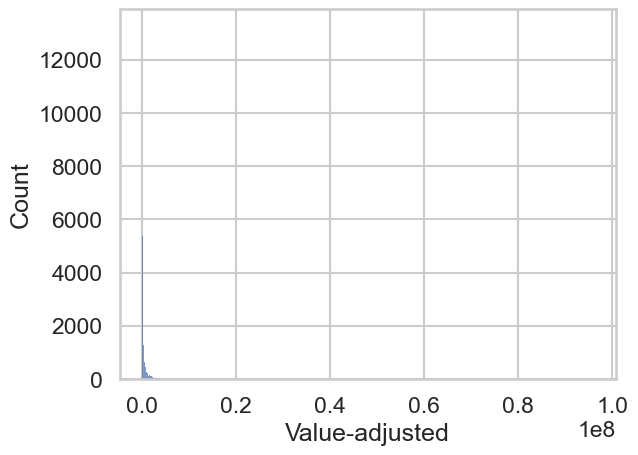

In [9]:
sns.histplot(data['Value-adjusted'])

In [10]:
data[data['Period'].dt.year > 2000]

Period                                          Commodity  \
0     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
1     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
2     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
3     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
4     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
...          ...                                                ...   
54969 2009-03-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54970 2009-03-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54971 2009-03-01  0306.12.90 - lobsters, (homarus spp), nes, fro...   
54972 2009-03-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54976 2001-04-01  0306.12.10 - lobsters in brine, (homarus spp),...   

                        Province               Country          State  \
0      Newfoundland and Labrador         United States  Massachusetts   
1                  New Brunswick         United States  Massachusetts   
2           Prince Edward Island         United States     California   
3                         Quebec         United States     California   
4           Prince Edward Island         United States  New Hampshire   
...                          ...                   ...            ...   
54969                Nova Scotia  Netherlands Antilles            NaN   
54970                Nova Scotia               Bermuda            NaN   
54971                     Quebec                 Aruba            NaN   
54972              New Brunswick              Mongolia            NaN   
54976       Prince Edward Island                 Chile            NaN   

       Quantity_kg  Value-adjusted  year            GDP-USD continent  
0            42059     3023516.549  2017 19477336549000.000  Americas  
1           370393    24808298.708  2017 19477336549000.000  Americas  
2             1633       38330.436  2017 19477336549000.000  Americas  
3             2347      121476.423  2017 19477336549000.000  Americas  
4            15676      383038.251  2017 19477336549000.000  Americas  
...            ...             ...   ...                ...       ...  
54969         5239      141445.129  2009   871518638049.218    Europe  
54970         1369       31506.953  2009     6656000000.000  Americas  
54971           21        1676.614  2009     2553631284.916  Americas  
54972          674       15519.141  2009     4583850367.890      Asia  
54976         5460       51361.585  2001    71517267767.736  Americas  

[36947 rows x 10 columns]

In [11]:
x_values = data.loc[data['Period'].dt.year > 2010,'Period']
type(x_values)

pandas.core.series.Series

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

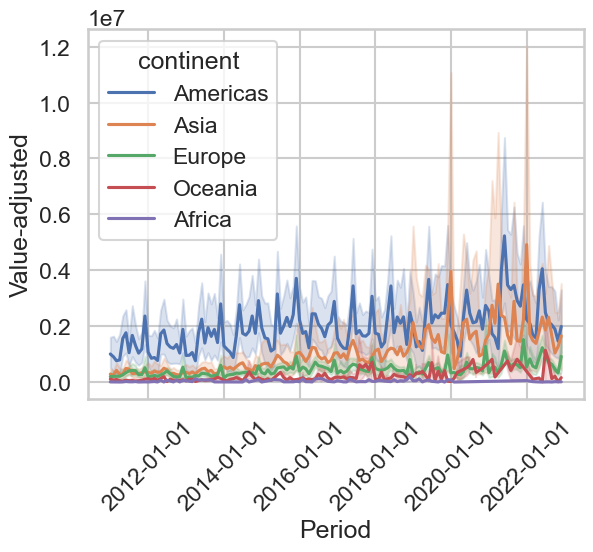

In [12]:

ax = sns.lineplot(data = data, x=x_values, y=data['Value-adjusted'], hue='continent')

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

(array([14610., 15340., 16071., 16801., 17532., 18262., 18993., 19723.]),
 [Text(14610.0, 0, '2010-01-01'),
  Text(15340.0, 0, '2012-01-01'),
  Text(16071.0, 0, '2014-01-01'),
  Text(16801.0, 0, '2016-01-01'),
  Text(17532.0, 0, '2018-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19723.0, 0, '2024-01-01')])

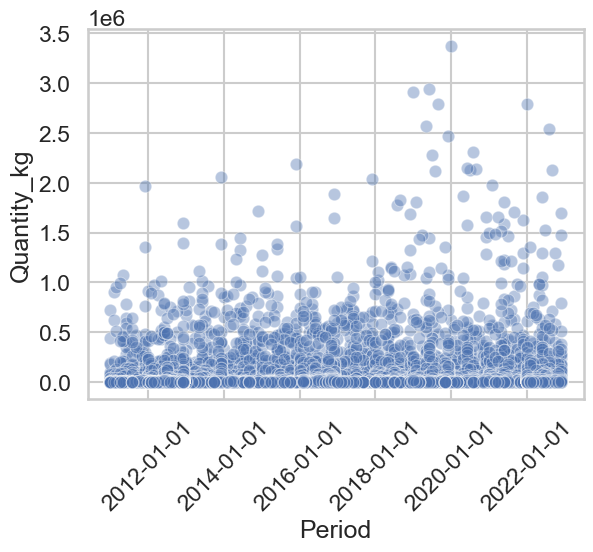

In [13]:
ax = sns.scatterplot(data = data, x=x_values, y=data['Quantity_kg'], alpha=0.4)

# Format the x-axis labels as dates
date_format = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

(array([-2.0e+07,  0.0e+00,  2.0e+07,  4.0e+07,  6.0e+07,  8.0e+07,
         1.0e+08,  1.2e+08]),
 [Text(-20000000.0, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(20000000.0, 0, '0.2'),
  Text(40000000.0, 0, '0.4'),
  Text(60000000.0, 0, '0.6'),
  Text(80000000.0, 0, '0.8'),
  Text(100000000.0, 0, '1.0'),
  Text(120000000.0, 0, '1.2')])

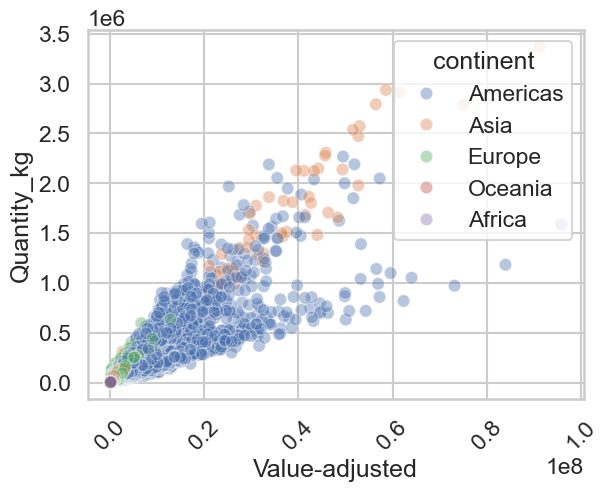

In [23]:
ax = sns.scatterplot(data = data, x=data['Value-adjusted'], y=data['Quantity_kg'], hue=data['continent'],alpha=0.4)

# Format the x-axis labels as dates
# date_format = mdates.DateFormatter('%Y-%m-%d')
# ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

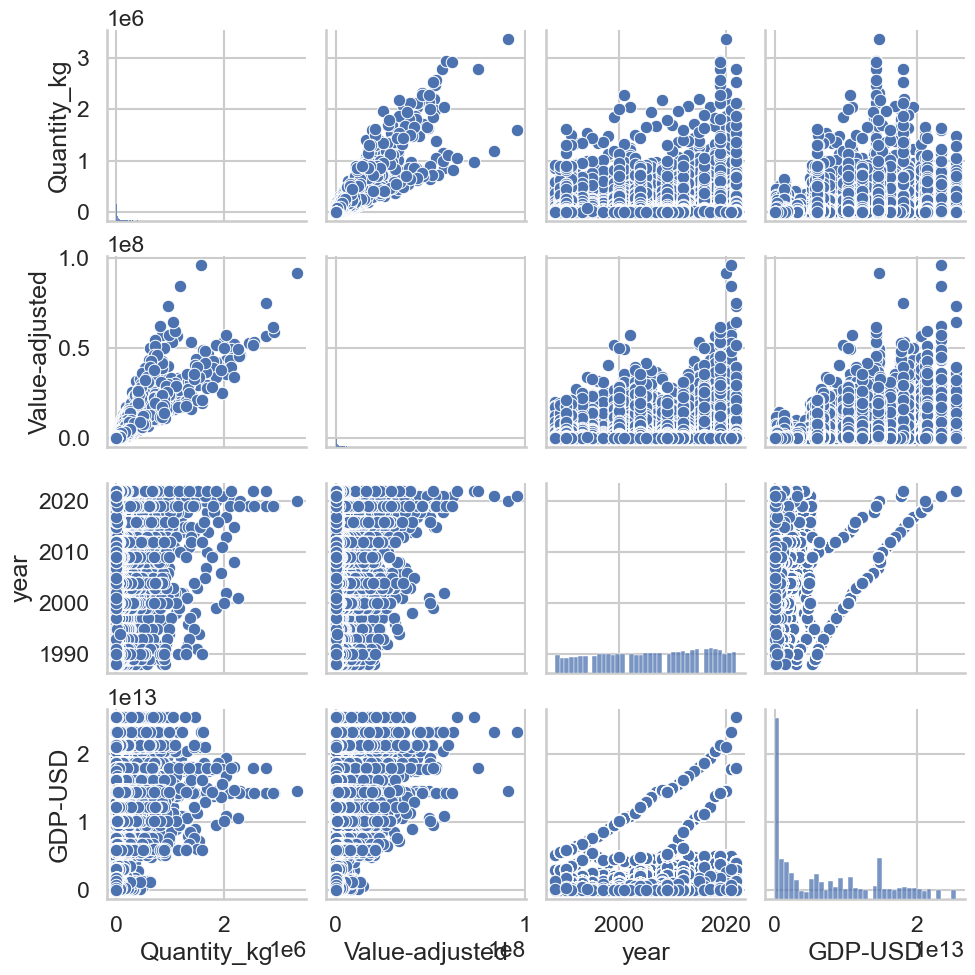

In [24]:
sns.pairplot(data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Newfoundland and Labrador'),
  Text(1, 0, 'New Brunswick'),
  Text(2, 0, 'Prince Edward Island'),
  Text(3, 0, 'Quebec'),
  Text(4, 0, 'Nova Scotia'),
  Text(5, 0, 'British Columbia'),
  Text(6, 0, 'Ontario'),
  Text(7, 0, 'Northwest Territories'),
  Text(8, 0, 'Saskatchewan'),
  Text(9, 0, 'Nunavut'),
  Text(10, 0, 'Alberta'),
  Text(11, 0, 'Manitoba')])

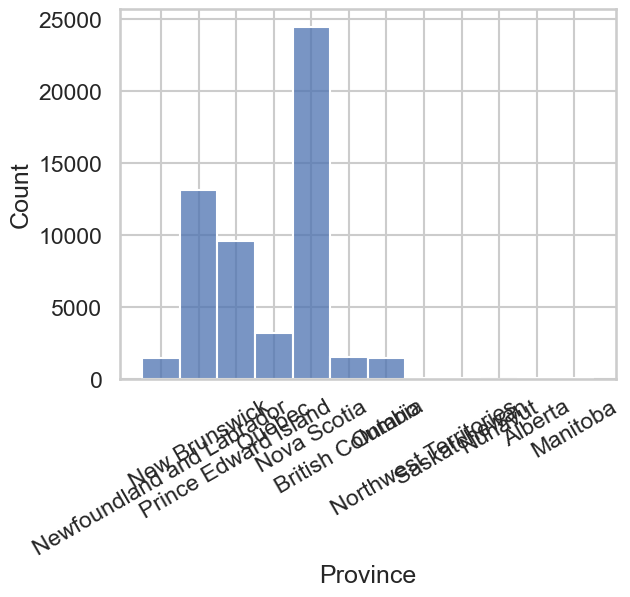

In [31]:
sns.histplot(data=data, x="Province")
plt.xticks(rotation=30)

In [35]:
us_data = data[data['Country'].str.contains('United States')]
us_data

Period                                          Commodity  \
0     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
1     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
2     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
3     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
4     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
...          ...                                                ...   
54047 1990-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54048 1990-04-01  0306.12.90 - lobsters, (homarus spp), nes, fro...   
54049 1990-04-01  0306.22.90 - lobsters,(homarus spp), not froze...   
54050 1990-04-01  0306.12.90 - lobsters, (homarus spp), nes, fro...   
54051 1990-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   

                        Province        Country          State  Quantity_kg  \
0      Newfoundland and Labrador  United States  Massachusetts        42059   
1                  New Brunswick  United States  Massachusetts       370393   
2           Prince Edward Island  United States     California         1633   
3                         Quebec  United States     California         2347   
4           Prince Edward Island  United States  New Hampshire        15676   
...                          ...            ...            ...          ...   
54047                Nova Scotia  United States          Maine       495399   
54048                Nova Scotia  United States  Massachusetts        22653   
54049              New Brunswick  United States  Massachusetts          998   
54050                     Quebec  United States  Massachusetts        92640   
54051                     Quebec  United States  Massachusetts         1361   

       Value-adjusted  year            GDP-USD continent  
0         3023516.549  2017 19477336549000.000  Americas  
1        24808298.708  2017 19477336549000.000  Americas  
2           38330.436  2017 19477336549000.000  Americas  
3          121476.423  2017 19477336549000.000  Americas  
4          383038.251  2017 19477336549000.000  Americas  
...               ...   ...                ...       ...  
54047     7596544.892  1990  5963144000000.000  Americas  
54048      967469.262  1990  5963144000000.000  Americas  
54049        9460.215  1990  5963144000000.000  Americas  
54050     1441995.600  1990  5963144000000.000  Americas  
54051       11560.246  1990  5963144000000.000  Americas  

[26802 rows x 10 columns]

In [39]:
data.dtypes

Period            datetime64[ns]
Commodity                 object
Province                  object
Country                   object
State                     object
Quantity_kg                int64
Value-adjusted           float64
year                       int64
GDP-USD                  float64
continent                 object
dtype: object

Text(0.5, 1.0, 'US export value')

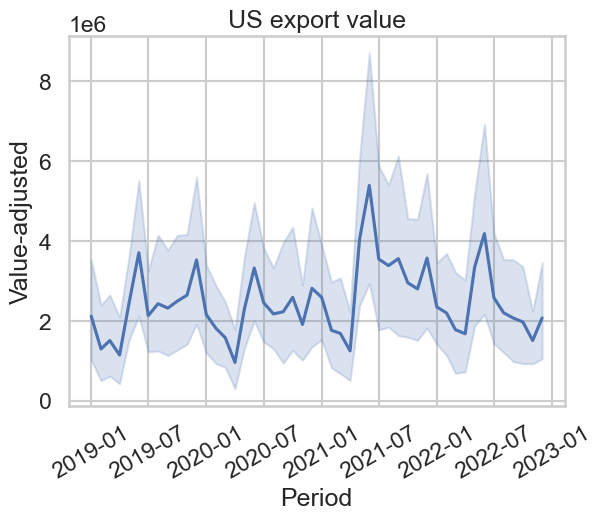

In [54]:
sns.lineplot(data = us_data , x=us_data.loc[us_data['Period'].dt.year > 2018, 'Period'], y=us_data.loc[us_data['Period'].dt.year > 2018, 'Value-adjusted'],)
plt.xticks(rotation=30)
plt.title('US export value')

In [71]:
### average monthly exports 
avg_monthly = data['Value-adjusted'].groupby([data['Period'].dt.month]).mean()
avg_monthly

Period
1     875523.177
2     749329.937
3     706944.850
4     688594.721
5    1222091.206
6    1416303.446
7     910178.716
8     965015.023
9     920302.572
10    852511.270
11    774530.292
12   1420427.837
Name: Value-adjusted, dtype: float64

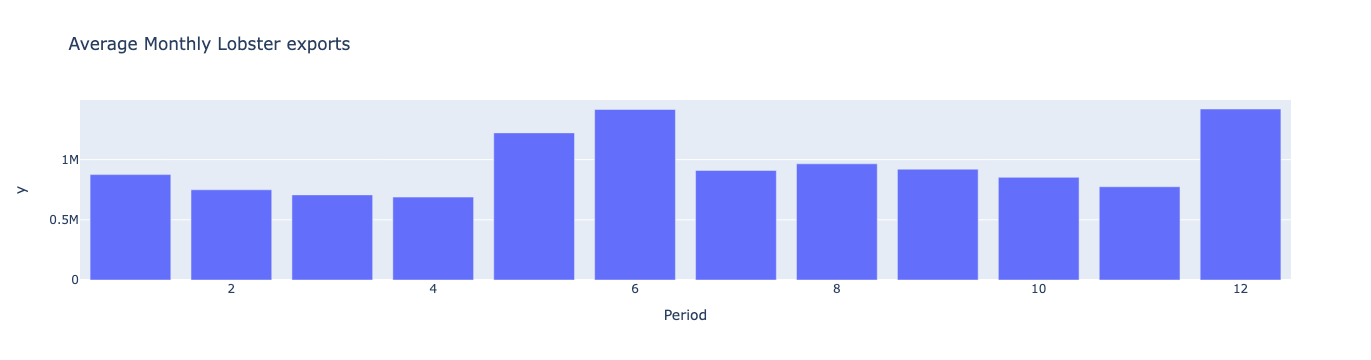

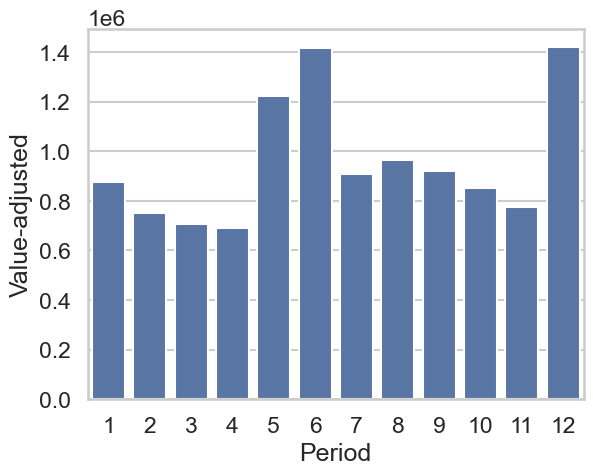

In [72]:
sns.barplot(x=avg_monthly.index, y=avg_monthly)

fig = px.bar(avg_monthly, x=avg_monthly.index, y=avg_monthly, title="Average Monthly Lobster exports")
fig.show()

In [16]:
chart_data = data.copy()
chart_data['Period'] = chart_data['Period'].dt.year
chart_data

Period                                          Commodity  \
0        2017  1605.30.10 - lobster, prepared or preserved, f...   
1        2017  1605.30.10 - lobster, prepared or preserved, f...   
2        2017   1605.30.90 - lobster, prepared or preserved, nes   
3        2017  1605.30.10 - lobster, prepared or preserved, f...   
4        2017   1605.30.90 - lobster, prepared or preserved, nes   
...       ...                                                ...   
54972    2009  0306.22.10 - lobsters, (homarus spp), live (te...   
54973    1988  0306.22.10 - lobsters, (homarus spp), live (te...   
54974    1991  0306.22.10 - lobsters, (homarus spp), live (te...   
54975    1990  0306.12.10 - lobsters in brine, (homarus spp),...   
54976    2001  0306.12.10 - lobsters in brine, (homarus spp),...   

                        Province        Country          State  Quantity_kg  \
0      Newfoundland and Labrador  United States  Massachusetts        42059   
1                  New Brunswick  United States  Massachusetts       370393   
2           Prince Edward Island  United States     California         1633   
3                         Quebec  United States     California         2347   
4           Prince Edward Island  United States  New Hampshire        15676   
...                          ...            ...            ...          ...   
54972              New Brunswick       Mongolia            NaN          674   
54973                Nova Scotia   Korea, South            NaN           23   
54974                Nova Scotia          Ghana            NaN          176   
54975                    Ontario      Australia            NaN         8050   
54976       Prince Edward Island          Chile            NaN         5460   

       Value-adjusted  year            GDP-USD continent  
0         3023516.549  2017 19477336549000.000  Americas  
1        24808298.708  2017 19477336549000.000  Americas  
2           38330.436  2017 19477336549000.000  Americas  
3          121476.423  2017 19477336549000.000  Americas  
4          383038.251  2017 19477336549000.000  Americas  
...               ...   ...                ...       ...  
54972       15519.141  2009     4583850367.890      Asia  
54973         676.833  1988   199590823957.237      Asia  
54974        4275.165  1991     6603130039.873    Africa  
54975      169191.538  1990   311430632641.087   Oceania  
54976       51361.585  2001    71517267767.736  Americas  

[54977 rows x 10 columns]

In [267]:
chart_group = chart_data.groupby(['Period', 'continent']).sum()
chart_group= chart_group.reset_index()
chart_group

Period continent  Value-adjusted
0      1988    Africa     1660282.135
1      1988  Americas   514090604.455
2      1988      Asia    55760168.866
3      1988    Europe   166751813.629
4      1988   Oceania       82075.722
..      ...       ...             ...
162    2022    Africa      132837.485
163    2022  Americas  1730829385.462
164    2022      Asia   795831293.609
165    2022    Europe   378631622.049
166    2022   Oceania     6802625.923

[167 rows x 3 columns]

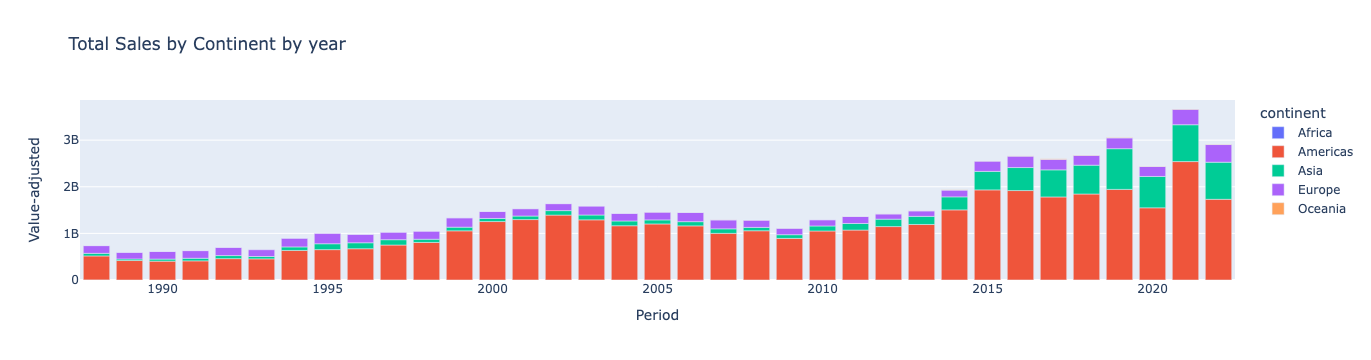

In [268]:
# data

fig = px.bar(chart_group, x=chart_group['Period'], y=chart_group["Value-adjusted"], color=chart_group['continent'], title="Total Sales by Continent by year")
fig.show()

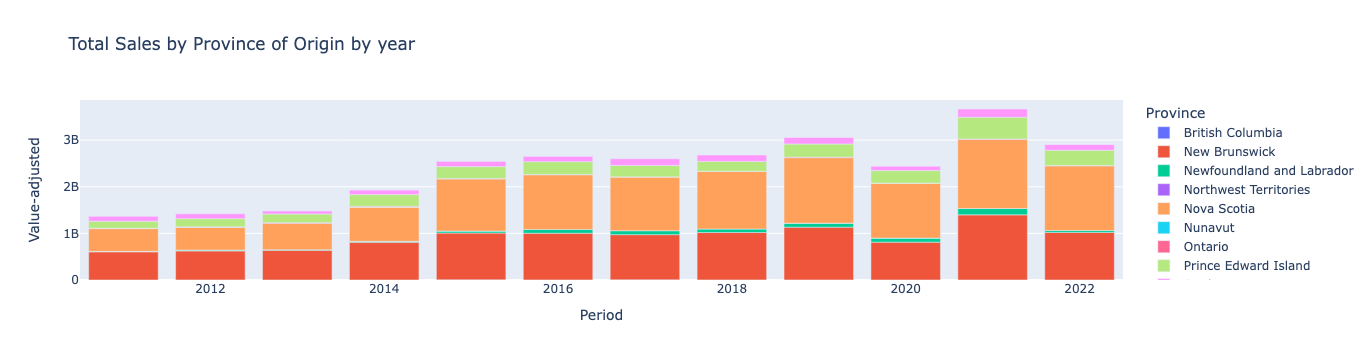

In [280]:
# data by procinve
chart_data = data.copy()
chart_data['Period'] = chart_data['Period'].dt.year
chart_data = chart_data[['Period', 'Province', 'Value-adjusted']]
# chart_data

chart_group = chart_data.groupby(['Period', 'Province']).sum()
chart_group= chart_group.reset_index()
chart_group = chart_group.loc[chart_group['Period'] > 2010, :]


fig = px.bar(chart_group, x=chart_group['Period'], y=chart_group["Value-adjusted"], color=chart_group['Province'], title="Total Sales by Province of Origin by year")
fig.show()

In [16]:
annual_data = data.drop(columns = ['Province', 'Country', 'State'])
annual_data['Year'] = data['Period'].dt.year
annual_data = annual_data.groupby(['Commodity', 'Year'], as_index=False).agg({'Value-adjusted': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)

# annual_data = annual_data.sort_values('Value_$', ascending = False).reset_index(drop=True)
annual_data

Commodity  Year  Value-adjusted  \
0    0306.11.00 - rock lobster & o sea crawfish,frz...  2012     2805977.742   
1    0306.11.00 - rock lobster & o sea crawfish,frz...  2013     2196320.532   
2    0306.11.00 - rock lobster & o sea crawfish,frz...  2014     4385596.409   
3    0306.11.00 - rock lobster & o sea crawfish,frz...  2015     7827297.396   
4    0306.11.00 - rock lobster & o sea crawfish,frz...  2016     2427392.627   
..                                                 ...   ...             ...   
345  1605.30.99 - lobster, prepared or preserved, o...  2012     4986991.471   
346  1605.30.99 - lobster, prepared or preserved, o...  2013     4828697.875   
347  1605.30.99 - lobster, prepared or preserved, o...  2014     4988870.801   
348  1605.30.99 - lobster, prepared or preserved, o...  2015    10674159.837   
349  1605.30.99 - lobster, prepared or preserved, o...  2016    11602815.862   

     Quantity_kg  
0         197718  
1         136571  
2         267010  
3         393285  
4          90651  
..           ...  
345       764314  
346       698505  
347       747611  
348       932522  
349       744658  

[350 rows x 4 columns]

In [17]:
annual_data.dtypes

Commodity          object
Year                int32
Value-adjusted    float64
Quantity_kg         int64
dtype: object

In [18]:
annual_data_22 = annual_data.copy()

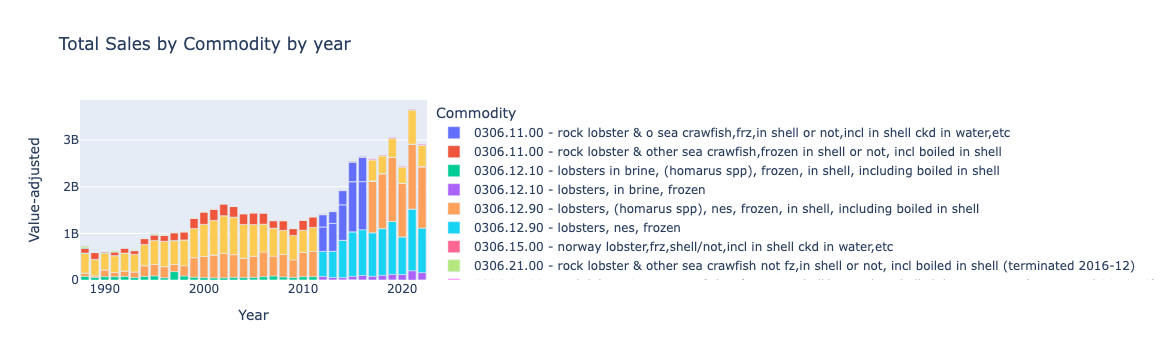

In [31]:



fig = px.bar(annual_data, x="Year", y="Value-adjusted", color='Commodity', title="Total Sales by Commodity by year")
fig.show()

In [171]:
data

Period                                          Commodity  \
0     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
1     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
2     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
3     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
4     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
...          ...                                                ...   
54972 2009-03-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54973 1988-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54974 1991-01-01  0306.22.10 - lobsters, (homarus spp), live (te...   
54975 1990-04-01  0306.12.10 - lobsters in brine, (homarus spp),...   
54976 2001-04-01  0306.12.10 - lobsters in brine, (homarus spp),...   

                        Province        Country          State  Quantity_kg  \
0      Newfoundland and Labrador  United States  Massachusetts        42059   
1                  New Brunswick  United States  Massachusetts       370393   
2           Prince Edward Island  United States     California         1633   
3                         Quebec  United States     California         2347   
4           Prince Edward Island  United States  New Hampshire        15676   
...                          ...            ...            ...          ...   
54972              New Brunswick       Mongolia            NaN          674   
54973                Nova Scotia   Korea, South            NaN           23   
54974                Nova Scotia          Ghana            NaN          176   
54975                    Ontario      Australia            NaN         8050   
54976       Prince Edward Island          Chile            NaN         5460   

       Value-adjusted  year            GDP-USD continent  
0         3023516.549  2017 19477336549000.000  Americas  
1        24808298.708  2017 19477336549000.000  Americas  
2           38330.436  2017 19477336549000.000  Americas  
3          121476.423  2017 19477336549000.000  Americas  
4          383038.251  2017 19477336549000.000  Americas  
...               ...   ...                ...       ...  
54972       15519.141  2009     4583850367.890      Asia  
54973         676.833  1988   199590823957.237      Asia  
54974        4275.165  1991     6603130039.873    Africa  
54975      169191.538  1990   311430632641.087   Oceania  
54976       51361.585  2001    71517267767.736  Americas  

[54977 rows x 10 columns]

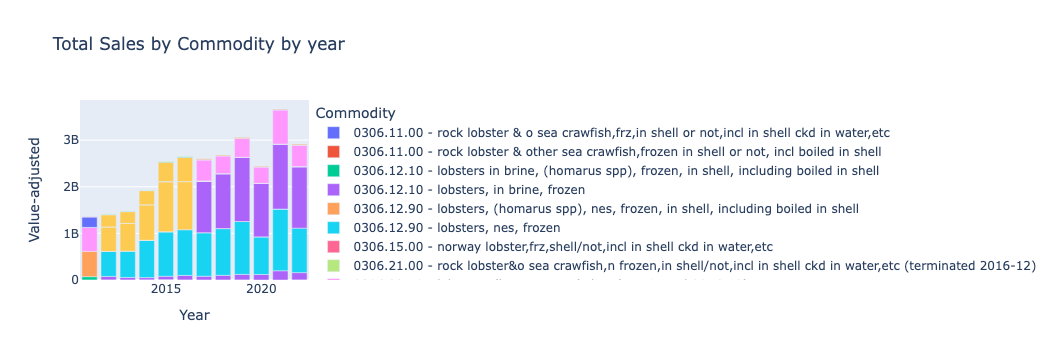

In [32]:
fig = px.bar(annual_data[annual_data['Year'] > 2010], x="Year", y="Value-adjusted", color='Commodity', title="Total Sales by Commodity by year")
fig.show()

In [19]:
def top_commodities_annual(df_name, year):
    annual_data = df_name.drop(columns = ['Province', 'Country', 'State'])
    annual_data['Year'] = annual_data['Period'].dt.year
    annual_data = annual_data.groupby(['Year', 'Commodity'], as_index=False).agg({'Value-adjusted': 'sum', 'Quantity_kg': 'sum'}).reset_index(drop=True)
    annual_data = annual_data[annual_data['Year'] == year].reset_index(drop = True)
    # annual total for that year to divide each commodity by 
    annual_total = data.loc[data['Period'].dt.year == year,'Value-adjusted'].sum()
    # print('annual_total - year: ', year, '\namount:', annual_total)
    annual_data['Value_percent'] = annual_data['Value-adjusted']/annual_total
    annual_data.sort_values(by=['Value-adjusted', 'Year'], ascending = False, inplace=True)
    return annual_data
    



In [20]:
a = top_commodities_annual(data, 2020)[['Commodity','Value_percent']]
a

Commodity  Value_percent
4                         0306.32.10 - lobsters, live          0.469
2                  0306.12.90 - lobsters, nes, frozen          0.331
9   1605.30.10 - lobster, prepared or preserved, f...          0.144
1             0306.12.10 - lobsters, in brine, frozen          0.049
11   1605.30.90 - lobster, prepared or preserved, nes          0.006
5   0306.32.90 - lobsters, fresh or chilled, o/t live          0.001
10  1605.30.20 - lobster, prepared or preserved, i...          0.000
8   0306.92.00 - lobsters, nes, dried/salted/in br...          0.000
7   0306.91.00 - rock lobster & other sea crawfish...          0.000
3   0306.31.00 - rock lobster and other sea crawfi...          0.000
6   0306.34.00 - norway lobsters, live, fresh or c...          0.000
0   0306.11.00 - rock lobster & o sea crawfish,frz...          0.000

In [21]:
b = top_commodities_annual(data, 2021)[['Commodity','Value_percent']]
b

Commodity  Value_percent
4                        0306.32.10 - lobsters, live          0.379
2                 0306.12.90 - lobsters, nes, frozen          0.361
7  1605.30.10 - lobster, prepared or preserved, f...          0.199
1            0306.12.10 - lobsters, in brine, frozen          0.054
9   1605.30.90 - lobster, prepared or preserved, nes          0.003
8  1605.30.20 - lobster, prepared or preserved, i...          0.003
5  0306.32.90 - lobsters, fresh or chilled, o/t live          0.001
3  0306.31.00 - rock lobster and other sea crawfi...          0.000
0  0306.11.00 - rock lobster & o sea crawfish,frz...          0.000
6  0306.92.00 - lobsters, nes, dried/salted/in br...          0.000

In [22]:
merged_df = pd.merge(a, b, on='Commodity')
merged_df

Commodity  Value_percent_x  \
0                        0306.32.10 - lobsters, live            0.469   
1                 0306.12.90 - lobsters, nes, frozen            0.331   
2  1605.30.10 - lobster, prepared or preserved, f...            0.144   
3            0306.12.10 - lobsters, in brine, frozen            0.049   
4   1605.30.90 - lobster, prepared or preserved, nes            0.006   
5  0306.32.90 - lobsters, fresh or chilled, o/t live            0.001   
6  1605.30.20 - lobster, prepared or preserved, i...            0.000   
7  0306.92.00 - lobsters, nes, dried/salted/in br...            0.000   
8  0306.31.00 - rock lobster and other sea crawfi...            0.000   
9  0306.11.00 - rock lobster & o sea crawfish,frz...            0.000   

   Value_percent_y  
0            0.379  
1            0.361  
2            0.199  
3            0.054  
4            0.003  
5            0.001  
6            0.003  
7            0.000  
8            0.000  
9            0.000

In [23]:
# get list of years from DF:
years_list =  list(set(data['Period'].dt.year.unique()))
years_list[:3]

[1988, 1989, 1990]

In [77]:
us_data = data[data['Country'] == 'United States'].reset_index(drop=True)
us_data

Period                                          Commodity  \
0     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
1     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
2     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
3     2017-05-01  1605.30.10 - lobster, prepared or preserved, f...   
4     2017-05-01   1605.30.90 - lobster, prepared or preserved, nes   
...          ...                                                ...   
26788 1990-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   
26789 1990-04-01  0306.12.90 - lobsters, (homarus spp), nes, fro...   
26790 1990-04-01  0306.22.90 - lobsters,(homarus spp), not froze...   
26791 1990-04-01  0306.12.90 - lobsters, (homarus spp), nes, fro...   
26792 1990-04-01  0306.22.10 - lobsters, (homarus spp), live (te...   

                        Province        Country          State  Quantity_kg  \
0      Newfoundland and Labrador  United States  Massachusetts        42059   
1                  New Brunswick  United States  Massachusetts       370393   
2           Prince Edward Island  United States     California         1633   
3                         Quebec  United States     California         2347   
4           Prince Edward Island  United States  New Hampshire        15676   
...                          ...            ...            ...          ...   
26788                Nova Scotia  United States          Maine       495399   
26789                Nova Scotia  United States  Massachusetts        22653   
26790              New Brunswick  United States  Massachusetts          998   
26791                     Quebec  United States  Massachusetts        92640   
26792                     Quebec  United States  Massachusetts         1361   

       Value-adjusted  year            GDP-USD continent  
0         3023516.549  2017 19477336549000.000  Americas  
1        24808298.708  2017 19477336549000.000  Americas  
2           38330.436  2017 19477336549000.000  Americas  
3          121476.423  2017 19477336549000.000  Americas  
4          383038.251  2017 19477336549000.000  Americas  
...               ...   ...                ...       ...  
26788     7596544.892  1990  5963144000000.000  Americas  
26789      967469.262  1990  5963144000000.000  Americas  
26790        9460.215  1990  5963144000000.000  Americas  
26791     1441995.600  1990  5963144000000.000  Americas  
26792       11560.246  1990  5963144000000.000  Americas  

[26793 rows x 10 columns]

<Axes: xlabel='Value-adjusted'>

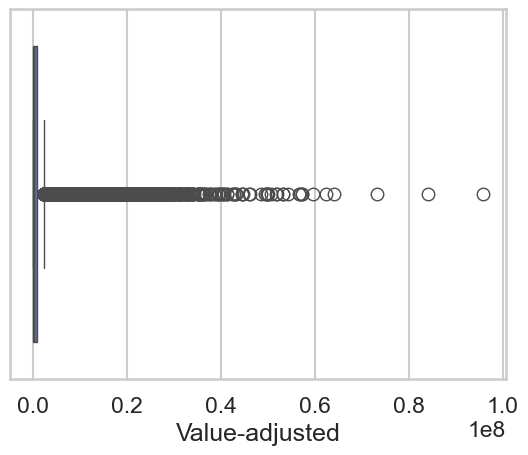

In [78]:
sns.boxplot(x=us_data["Value-adjusted"])

## Filtering Commoditities

In [132]:

merged_df = pd.DataFrame(columns = ['Commodity'],data = commoditites_list)
# merged_df = pd.DataFrame()
for year in years_list:
    # print(year)
    year_df = top_commodities_annual(data, year)[['Commodity','Value_percent']]
    year_df.rename(columns = {'Value_percent': year}, inplace = True)
    # print(year_df)
    # join merged df and percents based on commodity balue 
    merged_df = pd.merge(merged_df, year_df, on = 'Commodity', how='outer')
    # print(merged_df)
merged_df

Commodity  1988  1989  1990  1991  \
0   1605.30.10 - lobster, prepared or preserved, f...   NaN   NaN   NaN   NaN   
1    1605.30.90 - lobster, prepared or preserved, nes   NaN   NaN   NaN   NaN   
2   1605.30.20 - lobster, prepared or preserved, i...   NaN   NaN   NaN   NaN   
3                         0306.32.10 - lobsters, live   NaN   NaN   NaN   NaN   
4                  0306.12.90 - lobsters, nes, frozen   NaN   NaN   NaN   NaN   
5             0306.12.10 - lobsters, in brine, frozen   NaN   NaN   NaN   NaN   
6   0306.32.90 - lobsters, fresh or chilled, o/t live   NaN   NaN   NaN   NaN   
7   0306.11.00 - rock lobster & o sea crawfish,frz...   NaN   NaN   NaN   NaN   
8   0306.92.00 - lobsters, nes, dried/salted/in br...   NaN   NaN   NaN   NaN   
9   0306.91.00 - rock lobster & other sea crawfish...   NaN   NaN   NaN   NaN   
10  0306.31.00 - rock lobster and other sea crawfi...   NaN   NaN   NaN   NaN   
11  0306.34.00 - norway lobsters, live, fresh or c...   NaN   NaN   NaN   NaN   
12  0306.15.00 - norway lobster,frz,shell/not,incl...   NaN   NaN   NaN   NaN   
13  1605.30.11 - lobster meat, frozen, cooked by s...   NaN   NaN   NaN   NaN   
14  1605.30.19 - lobster meat, o/t frozen, cooked ...   NaN   NaN   NaN   NaN   
15  1605.30.91 - lobster, prepared or preserved, i... 0.054 0.002 0.004 0.041   
16  1605.30.99 - lobster, prepared or preserved, o...   NaN   NaN   NaN   NaN   
17   0306.22.10 - lobsters, live (terminated 2016-12)   NaN   NaN   NaN   NaN   
18  0306.22.90 - lobsters, not frozen, other than ...   NaN   NaN   NaN   NaN   
19  0306.21.00 - rock lobster&o sea crawfish,n fro...   NaN   NaN   NaN   NaN   
20  1605.30.11 - lobster meat, frozen, simply boil... 0.137 0.242 0.036 0.120   
21  1605.30.19 - lobster meat, not frozen, simply ...   NaN   NaN 0.003 0.002   
22  1605.30.99 - lobster, prepared or preserved, n...   NaN   NaN 0.002 0.004   
23  0306.12.10 - lobsters in brine, (homarus spp),... 0.102 0.095 0.117 0.112   
24  0306.22.10 - lobsters, (homarus spp), live (te... 0.568 0.583 0.585 0.567   
25  0306.12.90 - lobsters, (homarus spp), nes, fro... 0.097 0.057 0.234 0.141   
26  0306.22.90 - lobsters,(homarus spp), not froze... 0.014 0.011 0.018 0.011   
27  0306.11.00 - rock lobster & other sea crawfish... 0.000 0.000 0.000 0.001   
28  0306.21.00 - rock lobster & other sea crawfish... 0.002 0.002 0.000 0.000   
29  1605.30.12 - lobster meat, not frozen, simply ... 0.018 0.007   NaN   NaN   
30  1605.30.92 - lobster, prepared or preserved, n... 0.008 0.001   NaN   NaN   

    1992  1993  1994  1995  1996  ...  2013  2014  2015  2016  2017  2018  \
0    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.173 0.142   
1    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.007 0.006   
2    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.002 0.001   
3    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.424 0.438   
4    NaN   NaN   NaN   NaN   NaN  ... 0.379 0.414 0.375 0.368 0.359 0.374   
5    NaN   NaN   NaN   NaN   NaN  ... 0.035 0.025 0.028 0.036 0.031 0.037   
6    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.001 0.001   
7    NaN   NaN   NaN   NaN   NaN  ... 0.001 0.002 0.003 0.001 0.000 0.001   
8    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.001 0.000   
9    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000   NaN   
10   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000 0.000   
11   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000   NaN   
12   NaN   NaN   NaN   NaN   NaN  ...   NaN 0.000 0.000   NaN   NaN 0.000   
13   NaN   NaN   NaN   NaN   NaN  ... 0.169 0.156 0.162 0.194   NaN   NaN   
14   NaN   NaN   NaN   NaN   NaN  ... 0.007 0.006 0.005 0.005   NaN   NaN   
15 0.022 0.024 0.007 0.026 0.018  ... 0.003 0.001 0.001 0.003   NaN   NaN   
16   NaN   NaN   NaN   NaN   NaN  ... 0.003 0.003 0.004 0.004   NaN   NaN   
17   NaN   NaN   NaN   NaN   NaN  ... 0.401 0.394 0.419 0.388   N

In [133]:
data[data['Commodity'].str.contains('0306.22')]['Value-adjusted']

3802       7383.058
3803      77039.447
3804     175988.961
3805    1061247.534
3808     218614.835
            ...    
54969    141445.129
54970     31506.953
54972     15519.141
54973       676.833
54974      4275.165
Name: Value-adjusted, Length: 22338, dtype: float64

In [134]:
# drop rows where all values are nan
merged_df.dropna(how = 'all', axis = 0, ignore_index = True, inplace = True)


In [135]:
# list(merged_df.loc[:,~merged_df.columns.isin(['Commodity'])].columns)

In [136]:
merged_df

Commodity  1988  1989  1990  1991  \
0   1605.30.10 - lobster, prepared or preserved, f...   NaN   NaN   NaN   NaN   
1    1605.30.90 - lobster, prepared or preserved, nes   NaN   NaN   NaN   NaN   
2   1605.30.20 - lobster, prepared or preserved, i...   NaN   NaN   NaN   NaN   
3                         0306.32.10 - lobsters, live   NaN   NaN   NaN   NaN   
4                  0306.12.90 - lobsters, nes, frozen   NaN   NaN   NaN   NaN   
5             0306.12.10 - lobsters, in brine, frozen   NaN   NaN   NaN   NaN   
6   0306.32.90 - lobsters, fresh or chilled, o/t live   NaN   NaN   NaN   NaN   
7   0306.11.00 - rock lobster & o sea crawfish,frz...   NaN   NaN   NaN   NaN   
8   0306.92.00 - lobsters, nes, dried/salted/in br...   NaN   NaN   NaN   NaN   
9   0306.91.00 - rock lobster & other sea crawfish...   NaN   NaN   NaN   NaN   
10  0306.31.00 - rock lobster and other sea crawfi...   NaN   NaN   NaN   NaN   
11  0306.34.00 - norway lobsters, live, fresh or c...   NaN   NaN   NaN   NaN   
12  0306.15.00 - norway lobster,frz,shell/not,incl...   NaN   NaN   NaN   NaN   
13  1605.30.11 - lobster meat, frozen, cooked by s...   NaN   NaN   NaN   NaN   
14  1605.30.19 - lobster meat, o/t frozen, cooked ...   NaN   NaN   NaN   NaN   
15  1605.30.91 - lobster, prepared or preserved, i... 0.054 0.002 0.004 0.041   
16  1605.30.99 - lobster, prepared or preserved, o...   NaN   NaN   NaN   NaN   
17   0306.22.10 - lobsters, live (terminated 2016-12)   NaN   NaN   NaN   NaN   
18  0306.22.90 - lobsters, not frozen, other than ...   NaN   NaN   NaN   NaN   
19  0306.21.00 - rock lobster&o sea crawfish,n fro...   NaN   NaN   NaN   NaN   
20  1605.30.11 - lobster meat, frozen, simply boil... 0.137 0.242 0.036 0.120   
21  1605.30.19 - lobster meat, not frozen, simply ...   NaN   NaN 0.003 0.002   
22  1605.30.99 - lobster, prepared or preserved, n...   NaN   NaN 0.002 0.004   
23  0306.12.10 - lobsters in brine, (homarus spp),... 0.102 0.095 0.117 0.112   
24  0306.22.10 - lobsters, (homarus spp), live (te... 0.568 0.583 0.585 0.567   
25  0306.12.90 - lobsters, (homarus spp), nes, fro... 0.097 0.057 0.234 0.141   
26  0306.22.90 - lobsters,(homarus spp), not froze... 0.014 0.011 0.018 0.011   
27  0306.11.00 - rock lobster & other sea crawfish... 0.000 0.000 0.000 0.001   
28  0306.21.00 - rock lobster & other sea crawfish... 0.002 0.002 0.000 0.000   
29  1605.30.12 - lobster meat, not frozen, simply ... 0.018 0.007   NaN   NaN   
30  1605.30.92 - lobster, prepared or preserved, n... 0.008 0.001   NaN   NaN   

    1992  1993  1994  1995  1996  ...  2013  2014  2015  2016  2017  2018  \
0    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.173 0.142   
1    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.007 0.006   
2    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.002 0.001   
3    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.424 0.438   
4    NaN   NaN   NaN   NaN   NaN  ... 0.379 0.414 0.375 0.368 0.359 0.374   
5    NaN   NaN   NaN   NaN   NaN  ... 0.035 0.025 0.028 0.036 0.031 0.037   
6    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.001 0.001   
7    NaN   NaN   NaN   NaN   NaN  ... 0.001 0.002 0.003 0.001 0.000 0.001   
8    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.001 0.000   
9    NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000   NaN   
10   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000 0.000   
11   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN 0.000   NaN   
12   NaN   NaN   NaN   NaN   NaN  ...   NaN 0.000 0.000   NaN   NaN 0.000   
13   NaN   NaN   NaN   NaN   NaN  ... 0.169 0.156 0.162 0.194   NaN   NaN   
14   NaN   NaN   NaN   NaN   NaN  ... 0.007 0.006 0.005 0.005   NaN   NaN   
15 0.022 0.024 0.007 0.026 0.018  ... 0.003 0.001 0.001 0.003   NaN   NaN   
16   NaN   NaN   NaN   NaN   NaN  ... 0.003 0.003 0.004 0.004   NaN   NaN   
17   NaN   NaN   NaN   NaN   NaN  ... 0.401 0.394 0.419 0.388   N

In [137]:
columns_to_rank = list(columns_to_rank).sort()
columns_to_rank

In [138]:
# Select columns to rank (excluding 'Exclude' column)
columns_to_rank = merged_df.columns.difference(['Commodity'])

# Rank values within each selected column
merged_df[columns_to_rank] = merged_df[columns_to_rank].rank(axis=0)


In [139]:
merged_df

Commodity   1988   1989   1990  \
0   1605.30.10 - lobster, prepared or preserved, f...    NaN    NaN    NaN   
1    1605.30.90 - lobster, prepared or preserved, nes    NaN    NaN    NaN   
2   1605.30.20 - lobster, prepared or preserved, i...    NaN    NaN    NaN   
3                         0306.32.10 - lobsters, live    NaN    NaN    NaN   
4                  0306.12.90 - lobsters, nes, frozen    NaN    NaN    NaN   
5             0306.12.10 - lobsters, in brine, frozen    NaN    NaN    NaN   
6   0306.32.90 - lobsters, fresh or chilled, o/t live    NaN    NaN    NaN   
7   0306.11.00 - rock lobster & o sea crawfish,frz...    NaN    NaN    NaN   
8   0306.92.00 - lobsters, nes, dried/salted/in br...    NaN    NaN    NaN   
9   0306.91.00 - rock lobster & other sea crawfish...    NaN    NaN    NaN   
10  0306.31.00 - rock lobster and other sea crawfi...    NaN    NaN    NaN   
11  0306.34.00 - norway lobsters, live, fresh or c...    NaN    NaN    NaN   
12  0306.15.00 - norway lobster,frz,shell/not,incl...    NaN    NaN    NaN   
13  1605.30.11 - lobster meat, frozen, cooked by s...    NaN    NaN    NaN   
14  1605.30.19 - lobster meat, o/t frozen, cooked ...    NaN    NaN    NaN   
15  1605.30.91 - lobster, prepared or preserved, i...  6.000  4.000  5.000   
16  1605.30.99 - lobster, prepared or preserved, o...    NaN    NaN    NaN   
17   0306.22.10 - lobsters, live (terminated 2016-12)    NaN    NaN    NaN   
18  0306.22.90 - lobsters, not frozen, other than ...    NaN    NaN    NaN   
19  0306.21.00 - rock lobster&o sea crawfish,n fro...    NaN    NaN    NaN   
20  1605.30.11 - lobster meat, frozen, simply boil...  9.000  9.000  7.000   
21  1605.30.19 - lobster meat, not frozen, simply ...    NaN    NaN  4.000   
22  1605.30.99 - lobster, prepared or preserved, n...    NaN    NaN  3.000   
23  0306.12.10 - lobsters in brine, (homarus spp),...  8.000  8.000  8.000   
24  0306.22.10 - lobsters, (homarus spp), live (te... 10.000 10.000 10.000   
25  0306.12.90 - lobsters, (homarus spp), nes, fro...  7.000  7.000  9.000   
26  0306.22.90 - lobsters,(homarus spp), not froze...  4.000  6.000  6.000   
27  0306.11.00 - rock lobster & other sea crawfish...  1.000  1.000  2.000   
28  0306.21.00 - rock lobster & other sea crawfish...  2.000  3.000  1.000   
29  1605.30.12 - lobster meat, not frozen, simply ...  5.000  5.000    NaN   
30  1605.30.92 - lobster, prepared or preserved, n...  3.000  2.000    NaN   

     1991   1992   1993   1994   1995   1996  ...   2013   2014   2015  2016  \
0     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN    NaN    NaN    NaN  ...  9.000 11.000 10.000 8.000   
5     NaN    NaN    NaN    NaN    NaN    NaN  ...  7.000  8.000  8.000 6.000   
6     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
7     NaN    NaN    NaN    NaN    NaN    NaN  ...  3.000  5.000  4.000 2.000   
8     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
9     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
10    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
11    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
12    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN  2.000  1.000   NaN   
13    NaN    NaN    NaN    NaN    NaN    NaN  ...  8.000  9.000  9.000 7.000   
14    NaN    NaN    NaN    NaN    NaN    NaN  ...  6.000  7.000  7.000 5.000   
15  6.000  6.000  6.000  6.000  6.000  6.000  ...  4.000  4.000  3.000 3.000   
16    NaN    NaN    NaN    NaN    NaN    NaN  ...  5.000  6.000  6.000 4.000   
17    NaN    NaN    NaN    NaN    NaN    NaN  ... 10.000 10.000 11.000 9.000   
18    NaN    NaN    NaN    

In [145]:
# Melt the DataFrame to reshape it
melted_df = pd.melt(merged_df, id_vars=['Commodity'], var_name='Year', value_name='Rank')

melted_df[melted_df['Rank'].notnull()]

Commodity  Year   Rank
15    1605.30.91 - lobster, prepared or preserved, i...  1988  6.000
20    1605.30.11 - lobster meat, frozen, simply boil...  1988  9.000
23    0306.12.10 - lobsters in brine, (homarus spp),...  1988  8.000
24    0306.22.10 - lobsters, (homarus spp), live (te...  1988 10.000
25    0306.12.90 - lobsters, (homarus spp), nes, fro...  1988  7.000
...                                                 ...   ...    ...
1058                 0306.12.90 - lobsters, nes, frozen  2022  8.000
1059            0306.12.10 - lobsters, in brine, frozen  2022  6.000
1060  0306.32.90 - lobsters, fresh or chilled, o/t live  2022  4.000
1061  0306.11.00 - rock lobster & o sea crawfish,frz...  2022  2.000
1062  0306.92.00 - lobsters, nes, dried/salted/in br...  2022  1.000

[350 rows x 3 columns]

In [162]:
# Count the occurrences of each rank for each item
rank_frequencies = melted_df.groupby(['Commodity', 'Rank']).size().unstack(fill_value=0)

# Display the result
rank_frequencies.sort_values(by=[1, 2, 3, 4, 5, 6, 7, 8], ascending = False)

Rank                                                1.000   2.000   3.000   \
Commodity                                                                    
0306.21.00 - rock lobster & other sea crawfish ...      15       1       2   
0306.11.00 - rock lobster & other sea crawfish,...       6      13       3   
0306.21.00 - rock lobster&o sea crawfish,n froz...       3       1       0   
0306.31.00 - rock lobster and other sea crawfis...       2       1       2   
1605.30.91 - lobster, prepared or preserved, in...       2       0       8   
0306.92.00 - lobsters, nes, dried/salted/in bri...       2       0       2   
0306.22.90 - lobsters,(homarus spp), not frozen...       1       7       4   
0306.11.00 - rock lobster & o sea crawfish,frz,...       1       3       2   
0306.15.00 - norway lobster,frz,shell/not,incl ...       1       3       0   
0306.22.90 - lobsters, not frozen, other than l...       1       2       1   
0306.34.00 - norway lobsters, live, fresh or ch...       1       1       0   
1605.30.19 - lobster meat, not frozen, simply b...       0       2       6   
1605.30.92 - lobster, prepared or preserved, no...       0       1       1   
1605.30.99 - lobster, prepared or preserved, no...       0       0       3   
1605.30.20 - lobster, prepared or preserved, in...       0       0       1   
0306.32.90 - lobsters, fresh or chilled, o/t live        0       0       0   
0306.91.00 - rock lobster & other sea crawfish,...       0       0       0   
1605.30.99 - lobster, prepared or preserved, o/...       0       0       0   
1605.30.12 - lobster meat, not frozen, simply b...       0       0       0   
1605.30.19 - lobster meat, o/t frozen, cooked b...       0       0       0   
1605.30.90 - lobster, prepared or preserved, nes         0       0       0   
0306.12.10 - lobsters in brine, (homarus spp), ...       0       0       0   
0306.12.10 - lobsters, in brine, frozen                  0       0       0   
1605.30.11 - lobster meat, frozen, simply boile...       0       0       0   
0306.12.90 - lobsters, (homarus spp), nes, froz...       0       0       0   
1605.30.11 - lobster meat, frozen, cooked by st...       0       0       0   
1605.30.10 - lobster, prepared or preserved, fr...       0       0       0   
0306.12.90 - lobsters, nes, frozen                       0       0       0   
0306.22.10 - lobsters, (homarus spp), live (ter...       0       0       0   
0306.22.10 - lobsters, live (terminated 2016-12)         0       0       0   
0306.32.10 - lobsters, live                              0       0       0   

Rank                                                4.000   5.000   6.000   \
Commodity                                                                    
0306.21.00 - rock lobster & other sea crawfish ...       0       1       0   
0306.11.00 - rock lobster & other sea crawfish,...       1       0       0   
0306.21.00 - rock lobster&o sea crawfish,n froz...       0       0       0   
0306.31.00 - rock lobster and other sea crawfis...       0       0       0   
1605.30.91 - lobster, prepared or preserved, in...       4       5      10   
0306.92.00 - lobsters, nes, dried/salted/in bri...       0       1       1   
0306.22.90 - lobsters,(homarus spp), not frozen...       7       2       3   
0306.11.00 - rock lobster & o sea crawfish,frz,...       3       1       1   
0306.15.00 - norway lobster,frz,shell/not,incl ...       0       0       0   
0306.22.90 - lobsters, not frozen, other than l...       0       1       0   
0306.34.00 - norway lobsters, live, fresh or ch...       0       0       0   
1605.30.19 - lobster meat, not frozen, simply b...       6       7       1   
1605.30.92 - lobster, prepared or preserved, no...       0       0       0   
1605.30.99 - lobster, prepared or preserved, no...       8       7       4   
1605.30.20 - lobster, prepared or preserved, in...       0       3       1   
0306.32.90 - lobsters, fresh or chilled, o/t live        3       1       1   
0306.91.00 - rock lob

In [157]:
sns.barplot(x = rank_frequencies.index, y = rank_frequencies, orient = 'h')

ValueError: Data must be 1-dimensional, got ndarray of shape (31, 12) instead

In [100]:
merged_df

Commodity   1988   1989   1990  \
0   1605.30.10 - lobster, prepared or preserved, f...    NaN    NaN    NaN   
1    1605.30.90 - lobster, prepared or preserved, nes    NaN    NaN    NaN   
2   1605.30.20 - lobster, prepared or preserved, i...    NaN    NaN    NaN   
3                         0306.32.10 - lobsters, live    NaN    NaN    NaN   
4                  0306.12.90 - lobsters, nes, frozen    NaN    NaN    NaN   
5             0306.12.10 - lobsters, in brine, frozen    NaN    NaN    NaN   
6   0306.32.90 - lobsters, fresh or chilled, o/t live    NaN    NaN    NaN   
7   0306.11.00 - rock lobster & o sea crawfish,frz...    NaN    NaN    NaN   
8   0306.92.00 - lobsters, nes, dried/salted/in br...    NaN    NaN    NaN   
9   0306.91.00 - rock lobster & other sea crawfish...    NaN    NaN    NaN   
10  0306.31.00 - rock lobster and other sea crawfi...    NaN    NaN    NaN   
11  0306.34.00 - norway lobsters, live, fresh or c...    NaN    NaN    NaN   
12  0306.15.00 - norway lobster,frz,shell/not,incl...    NaN    NaN    NaN   
13  1605.30.11 - lobster meat, frozen, cooked by s...    NaN    NaN    NaN   
14  1605.30.19 - lobster meat, o/t frozen, cooked ...    NaN    NaN    NaN   
15  1605.30.91 - lobster, prepared or preserved, i...  6.000  4.000  5.000   
16  1605.30.99 - lobster, prepared or preserved, o...    NaN    NaN    NaN   
17   0306.22.10 - lobsters, live (terminated 2016-12)    NaN    NaN    NaN   
18  0306.22.90 - lobsters, not frozen, other than ...    NaN    NaN    NaN   
19  0306.21.00 - rock lobster&o sea crawfish,n fro...    NaN    NaN    NaN   
20  1605.30.11 - lobster meat, frozen, simply boil...  9.000  9.000  7.000   
21  1605.30.19 - lobster meat, not frozen, simply ...    NaN    NaN  4.000   
22  1605.30.99 - lobster, prepared or preserved, n...    NaN    NaN  3.000   
23  0306.12.10 - lobsters in brine, (homarus spp),...  8.000  8.000  8.000   
24  0306.22.10 - lobsters, (homarus spp), live (te... 10.000 10.000 10.000   
25  0306.12.90 - lobsters, (homarus spp), nes, fro...  7.000  7.000  9.000   
26  0306.22.90 - lobsters,(homarus spp), not froze...  4.000  6.000  6.000   
27  0306.11.00 - rock lobster & other sea crawfish...  1.000  1.000  2.000   
28  0306.21.00 - rock lobster & other sea crawfish...  2.000  3.000  1.000   
29  1605.30.12 - lobster meat, not frozen, simply ...  5.000  5.000    NaN   
30  1605.30.92 - lobster, prepared or preserved, n...  3.000  2.000    NaN   

     1991   1992   1993   1994   1995   1996  ...   2013   2014   2015  2016  \
0     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
1     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
2     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
3     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
4     NaN    NaN    NaN    NaN    NaN    NaN  ...  9.000 11.000 10.000 8.000   
5     NaN    NaN    NaN    NaN    NaN    NaN  ...  7.000  8.000  8.000 6.000   
6     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
7     NaN    NaN    NaN    NaN    NaN    NaN  ...  3.000  5.000  4.000 2.000   
8     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
9     NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
10    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
11    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN   NaN   
12    NaN    NaN    NaN    NaN    NaN    NaN  ...    NaN  2.000  1.000   NaN   
13    NaN    NaN    NaN    NaN    NaN    NaN  ...  8.000  9.000  9.000 7.000   
14    NaN    NaN    NaN    NaN    NaN    NaN  ...  6.000  7.000  7.000 5.000   
15  6.000  6.000  6.000  6.000  6.000  6.000  ...  4.000  4.000  3.000 3.000   
16    NaN    NaN    NaN    NaN    NaN    NaN  ...  5.000  6.000  6.000 4.000   
17    NaN    NaN    NaN    NaN    NaN    NaN  ... 10.000 10.000 11.000 9.000   
18    NaN    NaN    NaN    

In [51]:
df_ranked = merged_df[['Commodity',2022]].sort_values(by = 2022, ascending = False)

In [52]:
df_ranked['2022_rank'] = merged_df[[2022]].rank(ascending = False)

In [53]:
df_ranked

Commodity  2022  2022_rank
3                         0306.32.10 - lobsters, live 0.450      1.000
4                  0306.12.90 - lobsters, nes, frozen 0.328      2.000
0   1605.30.10 - lobster, prepared or preserved, f... 0.156      3.000
5             0306.12.10 - lobsters, in brine, frozen 0.053      4.000
1    1605.30.90 - lobster, prepared or preserved, nes 0.006      5.000
6   0306.32.90 - lobsters, fresh or chilled, o/t live 0.004      6.000
2   1605.30.20 - lobster, prepared or preserved, i... 0.002      7.000
7   0306.11.00 - rock lobster & o sea crawfish,frz... 0.001      8.000
8   0306.92.00 - lobsters, nes, dried/salted/in br... 0.000      9.000
9   0306.91.00 - rock lobster & other sea crawfish...   NaN        NaN
10  0306.31.00 - rock lobster and other sea crawfi...   NaN        NaN
11  0306.34.00 - norway lobsters, live, fresh or c...   NaN        NaN
12  0306.15.00 - norway lobster,frz,shell/not,incl...   NaN        NaN
13  1605.30.11 - lobster meat, frozen, cooked by s...   NaN        NaN
14  1605.30.19 - lobster meat, o/t frozen, cooked ...   NaN        NaN
15  1605.30.91 - lobster, prepared or preserved, i...   NaN        NaN
16  1605.30.99 - lobster, prepared or preserved, o...   NaN        NaN
17   0306.22.10 - lobsters, live (terminated 2016-12)   NaN        NaN
18  0306.22.90 - lobsters, not frozen, other than ...   NaN        NaN
19  0306.21.00 - rock lobster&o sea crawfish,n fro...   NaN        NaN
20  1605.30.11 - lobster meat, frozen, simply boil...   NaN        NaN
21  1605.30.19 - lobster meat, not frozen, simply ...   NaN        NaN
22  1605.30.99 - lobster, prepared or preserved, n...   NaN        NaN
23  0306.12.10 - lobsters in brine, (homarus spp),...   NaN        NaN
24  0306.22.10 - lobsters, (homarus spp), live (te...   NaN        NaN
25  0306.12.90 - lobsters, (homarus spp), nes, fro...   NaN        NaN
26  0306.22.90 - lobsters,(homarus spp), not froze...   NaN        NaN
27  0306.11.00 - rock lobster & other sea crawfish...   NaN        NaN
28  0306.21.00 - rock lobster & other sea crawfish...   NaN        NaN
29  1605.30.12 - lobster meat, not frozen, simply ...   NaN        NaN
30  1605.30.92 - lobster, prepared or preserved, n...   NaN        NaN

In [29]:
# merged_df.groupby('Commodity').mean(axis = 1)

c = merged_df.iloc[:,1:].mean(axis=1) > 0.01


In [30]:
import plotly.express as px

In [33]:
# which 10 commodities represent the largest proportion of sales per year? 

In [164]:
annual_data

Commodity  Year  Value-adjusted  \
0    0306.11.00 - rock lobster & o sea crawfish,frz...  2012     2805977.742   
1    0306.11.00 - rock lobster & o sea crawfish,frz...  2013     2196320.532   
2    0306.11.00 - rock lobster & o sea crawfish,frz...  2014     4385596.409   
3    0306.11.00 - rock lobster & o sea crawfish,frz...  2015     7827297.396   
4    0306.11.00 - rock lobster & o sea crawfish,frz...  2016     2427392.627   
..                                                 ...   ...             ...   
345  1605.30.99 - lobster, prepared or preserved, o...  2012     4986991.471   
346  1605.30.99 - lobster, prepared or preserved, o...  2013     4828697.875   
347  1605.30.99 - lobster, prepared or preserved, o...  2014     4988870.801   
348  1605.30.99 - lobster, prepared or preserved, o...  2015    10674159.837   
349  1605.30.99 - lobster, prepared or preserved, o...  2016    11602815.862   

     Quantity_kg  
0         197718  
1         136571  
2         267010  
3         393285  
4          90651  
..           ...  
345       764314  
346       698505  
347       747611  
348       932522  
349       744658  

[350 rows x 4 columns]

In [163]:
fig = px.bar(annual_data[annual_data['Year'] > 2010], x="Year", y="Value-adjusted", color='Country', title="Total Sales by Commodity by year")
fig.show()

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Commodity', 'Year', 'Value-adjusted', 'Quantity_kg'] but received: Country